### 경사하강법
기계학습의 대부분은 학습 단계에서 최적의 매개변수를 찾아냅니다. 신경망 역시 최적의 매개변수(가중치, 편향)를 학습시에 찾아야 합니다. 이런 상황에서 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법입니다. 

#### 주의해야할 점
각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 것입니다. 하지만 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없습니다. 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동합니다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복합니다.. 이렇게 함수의 값을 점차 줄이는 것을 `경사하강법` 혹은 `경사상승법` 이라고 합니다.

### 수식
> x<sub>0</sub> = x<sub>0</sub> - ŋ * ∂f / ∂x<sub>0</sub> <br>
x<sub>1</sub> = x<sub>1</sub> - ŋ * ∂f / ∂x<sub>1</sub>

수식에서 기호 ŋ는 갱신하는 양을 나타냅니다. 이는 신경망에서는 `학습률`이라고 합니다. 한 번의 학습으로 얼마만큼 학습해야 할지, 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률입니다. 이 학습률은 너무 커서도 안되고 너무 작아도 안됩니다.

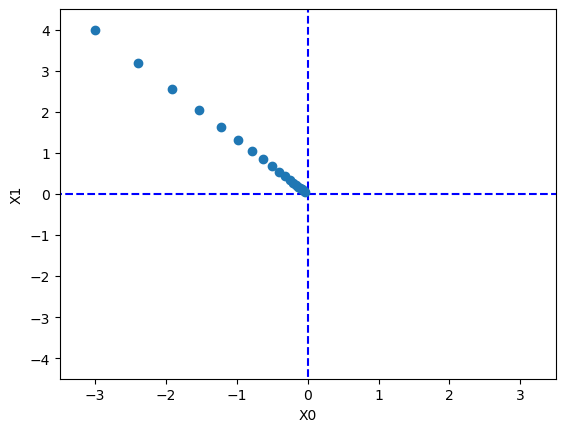

In [2]:
# 경사법 구현
import numpy as np
import matplotlib.pylab as plt
from mymodules.gradient import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for _ in range(step_num):
        x_history.append( x.copy() ) # 개선되는 x값을 빈 리스트에 저장해서 히스토리를 만든다.
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

# 문제 : 경사법으로 f(x0, x1) = x0^2 + x1^2의 최솟값을 구하라
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0]) # init_x 정의

lr = 0.1 # 학습률
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num) # 경사하강법 시행

# 시각화
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show() # 기울기가 점점 작아지는 것을 확인할 수 있다.

In [4]:
# 학습률이 너무 크거나 작다면?
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, 10.0, 100)) # 학습률이 너무 큰 경우 굉장히 큰 값으로 발산하고,

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, 1e-10, 100) # 학습률이 너무 작은 경우 갱신하지도 못한 채 끝난다.

(array([-2.58983747e+13, -1.29524862e+12]), array([[-3.00000000e+00,  4.00000000e+00],
       [ 5.70000000e+01, -7.60000000e+01],
       [-1.08300000e+03,  1.44400000e+03],
       [ 2.05770000e+04, -2.74360000e+04],
       [-3.90963008e+05,  5.21284002e+05],
       [ 7.42829664e+06, -9.90439654e+06],
       [-1.41137328e+08,  1.88183103e+08],
       [ 2.68126267e+09, -3.57501690e+09],
       [-5.09763373e+10,  6.79001831e+10],
       [ 9.45170863e+11, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2.58983747e+13, -1.29524862e+12],
       [-2

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

In [8]:
from mymodules.functions import softmax, cross_entropy_error
from mymodules.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        # np.random.randn(int or int, int) : 적는 숫자의 shape으로 정규분포 배열을 생성해준다.
        # ex) np.random.randn(6) : shape이 (6, )인 정규분포 배열 생성
        # ex) np.random.randn(3, 2) : shape이 (3, 2)인 정규분포 2차원 배열 생성
        self.W = np.random.randn(2, 3) # W : shape가 (2, 3)인 가중치 매개변수. 정규분포로 정규화한다.
    
    def predict(self, x): 
        return np.dot(x, self.W) # 입력과 가중치에 대한 가중합
    
    def loss(self, x, t): 
        z = self.predict(x) # 가중합 
        y = softmax(z) # 출력신호를 생성하고
        loss = cross_entropy_error(y, t) # 손실값을 계산한다.
        
        return loss
        
net = simpleNet() # 클래스 객체를 생성하고
print(net.W, net.W.shape)
x = np.array([0.6, 0.9]) # 입력데이터를 준비한다.
p = net.predict(x) # 가중합을 계산
print(p)
print(np.argmax(p)) # 최대값의 인덱스 : 2 ➡️ 정답이 2번 인덱스에 해당하는 값에 들어있다.

[[-0.25019229  2.57850026  0.29134874]
 [ 0.03045833 -1.10312111  3.11782227]] (2, 3)
[-0.12270287  0.55429116  2.98084928]
2


In [13]:
t = np.array([0, 0, 1]) # 정답 레이블 생성
net.loss(x, t) # 손실값 계산

# 기울기를 구해보자.
def f(W): # net.W를 받아 손실값을 계산하는 함수 정의
    return net.loss(x, t)

dW = numerical_gradient(f, net.W) # 정의한 함수를 numerical_gradient로 전달
print(dW.shape)
dW

(2, 3)


array([[ 0.02376718,  0.0467727 , -0.07053987],
       [ 0.03565077,  0.07015904, -0.10580981]])

### 학습 알고리즘 구현하기
지금까지 해온 과정을 보면 아래와 같다.

- 전제 : 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 "학습"이라고 한다. 아래의 과정으로 진행한다.
    + 1. mini batch : 훈련 데이터 중 일부를 무작위로 가져온다. 미니 배치의 loss function value를 줄이는 것이 목표이다.
    + 2. 기울기 산출 : 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다.
    + 3. 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.
    + 4. 반복 : 1 ~ 3 단계를 반복합니다.

이는 경사 하강법으로 매개변수를 갱신하는 방법이며 이 때 데이터를 미니배치로 무작위로 선정하기 때문에 **확률적 경사 하강법**이라고 부릅니다. 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사 하강법이라는 의미입니다.

In [14]:
# 2층 신경망 클래스 구현하기
from mymodules.functions import *
from mymodules.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {} # 가중치 초기화
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size) # (input size, hidden size)의 크기로 정규분포를 따르는 배열(가중치)을 생성하되, 표준화를 진행
        self.params["b1"] = np.zeros(hidden_size) # hidden size만큼 0으로 이루어진 배열(편향값) 생성
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params["b2"] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        a1 = np.dot(x, W1) + b1 # 은닉층 전달 가중합 계산
        z1 = sigmoid(a1) # 활성화
        a2 = np.dot(z1, W2) + b2 # 출령층 전달 가중합 계산
        y = softmax(a2) # 예측 출력
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(y, axos = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads

TwoLayerNet 클래스가 사용하는 변수

|변수|설명|
|---|---|
|params|신경망의 매개변수를 보관하는 딕셔너리 변수(인스턴스 변수) <br>params["W1"]은 1번째 층의 가중치, params["b1"]은 1번째 층의 편향 <br> params["W2"]은 2번째 층의 가중치, params["b2"]은 2번째 층의 편향|
|grads|기울기를 보관하는 딕셔너리 변수(numerical_gradient() 메소드의 반환값) <br> grads["W1"]은 1번째 층의 가중치의 기울기, grads["b1"]은 1번째 층의 편향값의 기울기 <br>grads["W2"]은 2번째 층의 가중치의 기울기, grads["b2"]은 2번째 층의 편향값의 기울기|

TwoLayerNet 클래스의 메소드

|메소드|설명|
|---|---|
|`__init__(self, input_size, hidden_size, output_size)`|초기화를 진행한다. 인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수|
|predict(self, x)|예측(추론)을 진행한다. 인수 x는 이미지 데이터|
|loss(self, x, t)|손실함수의 값을 구한다. 인수 x는 이미지 데이터, t는 정답 레이블(아래 세 개의 메소드도 동일)|
|accuracy(self, x, t)|정확도를 구한다.|
|numerical_gradient(self, x, t)|가중치 매개변수의 기울기를 구한다.|
|gradient(self, x, t)|가중치 매개변수의 기울기를 구한다. 위 메소드의 성능이 개선된 버전이다.

In [24]:
# params 변수에는 이 신경망에 필요한 매개변수가 모두 저장됩니다. 그리고 params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용됩니다.
# 예측처리 예시
net = TwoLayerNet(784, 100, 10)
print(net.params["W1"].shape) # 입력 -> 은닉층 가중치
print(net.params["W2"].shape) # 은닉 -> 출력층 가중치
print(net.params["b1"].shape) # 은닉층 편향값
print(net.params["b2"].shape) # 출력층 편향값

x = np.random.rand(100, 784) # input shape를 맞춰주기 위해 100개의 데이터를 임시로 생성하되, 784(원래는 28x28)열의 데이터로 생성
y = net.predict(x)

# grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장됩니다. 예를 들어 다음과 같이 numerical_gradient() 메서드를 사용해 기울기를 계산하면 grads 변수에 기울기 정보가 저장됩니다.
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 레이블(100장 분량) 
grads = net.numerical_gradient(x, t)
print(grads["W1"].shape)
print(grads["W2"].shape)
print(grads["b1"].shape)
print(grads["b2"].shape)

(784, 100)
(100, 10)
(100,)
(10,)
(784, 100)
(100, 10)
(100,)
(10,)


In [25]:
# 미니배치 학습 구현하기
from mymodules.mnist import load_mnist

(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼 파라미터
n_iters = 1000 # 반복 횟수
train_size = X_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(784, 50, 10)

for i in range(n_iters):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    y_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, y_batch)
    
    # 매개변수 갱신
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
